In [1]:
#SARIMA Algorithm

In [2]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install prophet
!pip install statsmodels
!pip install scikit-learn
!pip install numpy seaborn
!pip install plotly
!pip install numpy pandas matplotlib seaborn
!pip install jovian opendatasets xgboost graphviz lightgbm scikit-learn xgboost lightgbm
!pip install --upgrade scikit-learn

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.simplefilter('ignore')
import os
import plotly.express as px
import matplotlib.style as style

# Modelling
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

# Visualizations
import seaborn as sns
sns.set(rc={'figure.figsize': (20, 5)})

style.use('seaborn-poster')
style.use("fivethirtyeight")
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['figure.facecolor'] = '#00000000'
%matplotlib inline

In [43]:
from prophet import Prophet

In [44]:
pd.options.display.max_columns=100

In [45]:
#Load The data
df_train = pd.read_csv('C:/Users/91773/OneDrive/Desktop/Unmesh/train.csv' , nrows=2000)
df_features = pd.read_csv('C:/Users/91773/OneDrive/Desktop/Unmesh/features.csv' ,nrows=2000)
df_stores = pd.read_csv('C:/Users/91773/OneDrive/Desktop/Unmesh/stores.csv', nrows=2000)


In [46]:
train_data = df_train.merge(df_features, on=['Store','Date'], how='inner').merge(df_stores, on=['Store'], how='inner')
#test_data = df_test.merge(df_features, on=['Store', 'Date'], how='inner').merge(df_stores, on=['Store'], how='inner')

In [47]:
train_data.shape

(2000, 17)

In [48]:
train_data.isna().sum()

Store              0
Dept               0
Date               0
Weekly_Sales       0
IsHoliday_x        0
Temperature        0
Fuel_Price         0
MarkDown1       1288
MarkDown2       1413
MarkDown3       1302
MarkDown4       1288
MarkDown5       1288
CPI                0
Unemployment       0
IsHoliday_y        0
Type               0
Size               0
dtype: int64

In [49]:
train_data.rename(columns={'Date': 'ds', 'Weekly_Sales': 'y','IsHoliday_x':'IsHoliday'}, inplace=True)


In [50]:
train_data

,Store,Dept,ds,y,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1,9,2012-10-26,41040.84,False,69.16,3.506,2585.85,31.75,6.0,1057.16,1305.01,223.444251,6.573,False,A,151315
1996,1,10,2012-10-26,26285.27,False,69.16,3.506,2585.85,31.75,6.0,1057.16,1305.01,223.444251,6.573,False,A,151315
1997,1,11,2012-10-26,22399.83,False,69.16,3.506,2585.85,31.75,6.0,1057.16,1305.01,223.444251,6.573,False,A,151315
1998,1,12,2012-10-26,8658.41,False,69.16,3.506,2585.85,31.75,6.0,1057.16,1305.01,223.444251,6.573,False,A,151315


In [51]:
cols_to_drop = ["IsHoliday_y","MarkDown1", "MarkDown2", "MarkDown3","MarkDown4","MarkDown5"]
train_data.drop(columns=cols_to_drop, inplace=True)

In [52]:
train_data.head()

,Store,Dept,ds,y,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,211.096358,8.106,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,211.096358,8.106,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,211.096358,8.106,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,211.096358,8.106,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,211.096358,8.106,A,151315


In [53]:
train_size = int(len(train_data) * 0.75)
train_data_1 = train_data.iloc[:train_size]
test_data_1 = train_data.iloc[train_size:]

In [54]:
train_data_1

,Store,Dept,ds,y,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,211.096358,8.106,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,211.096358,8.106,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,211.096358,8.106,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,211.096358,8.106,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,211.096358,8.106,A,151315
...,...,...,...,...,...,...,...,...,...,...,...
1495,1,12,2012-02-17,9262.33,False,45.32,3.510,220.425759,7.348,A,151315
1496,1,13,2012-02-17,38622.92,False,45.32,3.510,220.425759,7.348,A,151315
1497,1,14,2012-02-17,21324.12,False,45.32,3.510,220.425759,7.348,A,151315
1498,1,1,2012-02-24,20124.22,False,57.25,3.555,220.636902,7.348,A,151315


In [55]:
test_data_1

,Store,Dept,ds,y,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
1500,1,3,2012-02-24,10502.40,False,57.25,3.555,220.636902,7.348,A,151315
1501,1,4,2012-02-24,34953.85,False,57.25,3.555,220.636902,7.348,A,151315
1502,1,5,2012-02-24,30797.88,False,57.25,3.555,220.636902,7.348,A,151315
1503,1,6,2012-02-24,3784.06,False,57.25,3.555,220.636902,7.348,A,151315
1504,1,7,2012-02-24,15956.87,False,57.25,3.555,220.636902,7.348,A,151315
...,...,...,...,...,...,...,...,...,...,...,...
1995,1,9,2012-10-26,41040.84,False,69.16,3.506,223.444251,6.573,A,151315
1996,1,10,2012-10-26,26285.27,False,69.16,3.506,223.444251,6.573,A,151315
1997,1,11,2012-10-26,22399.83,False,69.16,3.506,223.444251,6.573,A,151315
1998,1,12,2012-10-26,8658.41,False,69.16,3.506,223.444251,6.573,A,151315


In [56]:
p, d, q = 6, 1, 6
P, D, Q, s = 5, 1, 5, 7

In [57]:
# Calculate ACF and PACF
acf_values = sm.tsa.acf(train_data_1['y'], nlags=20) 
pacf_values = sm.tsa.pacf(train_data_1['y'], nlags=20) 

Text(0.5, 1.0, 'Autocorrelation Function (ACF)')

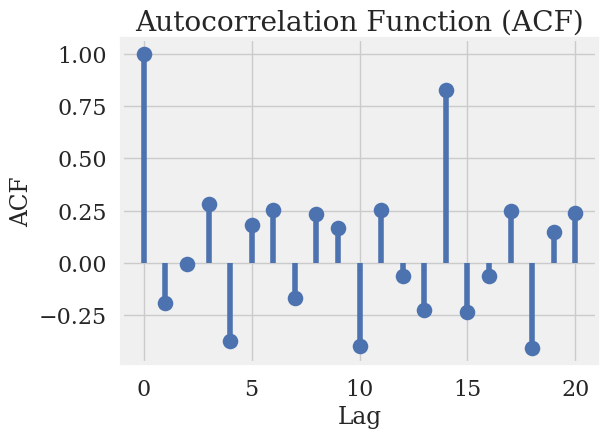

In [58]:
# Plot ACF
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.stem(range(len(acf_values)), acf_values, markerfmt='bo', linefmt='b-', basefmt=' ')
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.title('Autocorrelation Function (ACF)')

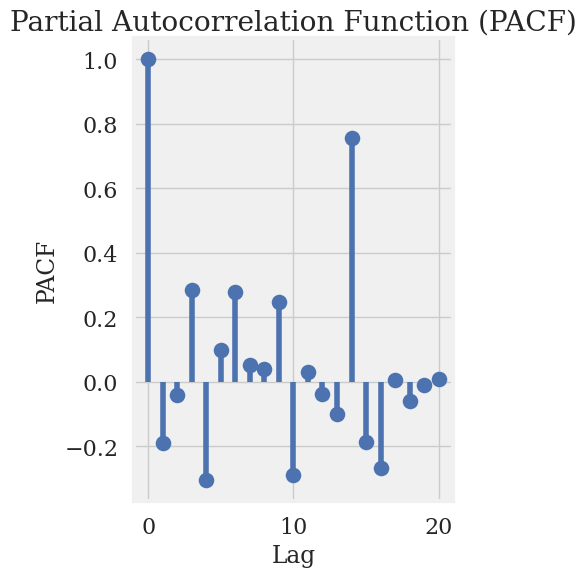

In [59]:
# Plot PACF
plt.subplot(122)
plt.stem(range(len(pacf_values)), pacf_values, markerfmt='bo', linefmt='b-', basefmt=' ')
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()

In [60]:
print("ACF Values:")
print(acf_values)

ACF Values:
[ 1.         -0.19055334 -0.00311392  0.28070271 -0.37449655  0.17897617
  0.25433174 -0.16827799  0.23156843  0.16582029 -0.39704679  0.25475609
 -0.06211215 -0.22416493  0.82789956 -0.23436661 -0.0618859   0.2480203
 -0.40714186  0.1469874   0.23729703]


In [61]:
print("\nPACF Values:")
print(pacf_values)


PACF Values:
[ 1.         -0.19068046 -0.04096662  0.28360506 -0.30386275  0.09827225
  0.27890094  0.05269857  0.03915005  0.24745395 -0.28989118  0.03122055
 -0.03796285 -0.09950695  0.75466916 -0.18693303 -0.26725579  0.00628612
 -0.06029553 -0.0094593   0.010231  ]


In [62]:
sarima_model = SARIMAX(train_data_1['y'], order=(p, d, q), seasonal_order=(P, D, Q, s))
sarima_results = sarima_model.fit()

In [64]:
forecast = sarima_results.get_forecast(steps=len(test_data_1))
forecast_mean = forecast.predicted_mean

In [65]:
rmse = sqrt(mean_squared_error(test_data_1['y'], forecast_mean))

In [66]:
rmse

6897.789969789559

In [67]:
forecast_mean

1500     3363.091639
1501    34867.112529
1502    37514.696844
1503     3688.637843
1504    19971.303003
            ...     
1995    36587.570246
1996    31087.385411
1997    30529.041730
1998    29828.210727
1999    14491.514213
Name: predicted_mean, Length: 500, dtype: float64

In [70]:
data_2 = pd.DataFrame()
data_2['predicted value']=forecast_mean

In [71]:
data_2

,predicted value
1500,3363.091639
1501,34867.112529
1502,37514.696844
1503,3688.637843
1504,19971.303003
...,...
1995,36587.570246
1996,31087.385411
1997,30529.041730
1998,29828.210727
